In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
weather = pd.read_csv('df_new_features.csv').set_index('Date')
weather.head()

,Mean_temp,Max_temp,Min_temp,Mean_temp_1,Mean_temp_2,Mean_temp_3,Max_temp_1,Max_temp_2,Max_temp_3,Min_temp_1,...,Pressure_3,Humidity_1,Humidity_2,Humidity_3,Wind_1,Wind_2,Wind_3,Clouds_1,Clouds_2,Clouds_3
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,7.083333,7.375000,6.541667,6.375000,6.208333,5.625000,6.583333,6.625000,6.041667,5.791667,...,1022.458333,72.458333,77.083333,74.875000,2.583333,1.916667,1.166667,24.333333,33.041667,26.041667
2017-01-05,6.250000,6.333333,5.875000,7.083333,6.375000,6.208333,7.375000,6.583333,6.625000,6.541667,...,1016.208333,67.291667,72.458333,77.083333,2.833333,2.583333,1.916667,40.750000,24.333333,33.041667
2017-01-06,3.541667,3.583333,3.250000,6.250000,7.083333,6.375000,6.333333,7.375000,6.583333,5.875000,...,1016.708333,51.625000,67.291667,72.458333,3.958333,2.833333,2.583333,68.375000,40.750000,24.333333
2017-01-07,5.416667,5.750000,5.125000,3.541667,6.250000,7.083333,3.583333,6.333333,7.375000,3.250000,...,1017.458333,62.666667,51.625000,67.291667,2.291667,3.958333,2.833333,22.500000,68.375000,40.750000
2017-01-08,6.125000,6.125000,5.833333,5.416667,3.541667,6.250000,5.750000,3.583333,6.333333,5.125000,...,1021.583333,65.583333,62.666667,51.625000,1.166667,2.291667,3.958333,71.375000,22.500000,68.375000


In [23]:
weather.corr()[['Mean_temp']].sort_values('Mean_temp')  

,Mean_temp
Pressure_3,-0.538490
Pressure_1,-0.535691
Pressure_2,-0.519089
Wind_1,-0.038399
Wind_2,-0.010644
Wind_3,0.014768
Humidity_2,0.020301
Humidity_3,0.027757
Humidity_1,0.032861
Clouds_2,0.187278


In [24]:
# remove features that have very low Correlation values
# also remove max and min temperatures since we already 
# have the mean temperatures
predictors =['Mean_temp_1','Mean_temp_2','Mean_temp_3',
             'Max_temp_1','Max_temp_2','Max_temp_3',
             'Min_temp_1','Min_temp_2','Min_temp_3',
             'Mean_dwp_1','Mean_dwp_2','Mean_dwp_3',
             'Max_dwp_1','Max_dwp_2','Max_dwp_3',
             'Min_dwp_1','Min_dwp_2','Min_dwp_3']

weather_2 = weather[['Mean_temp'] + predictors]

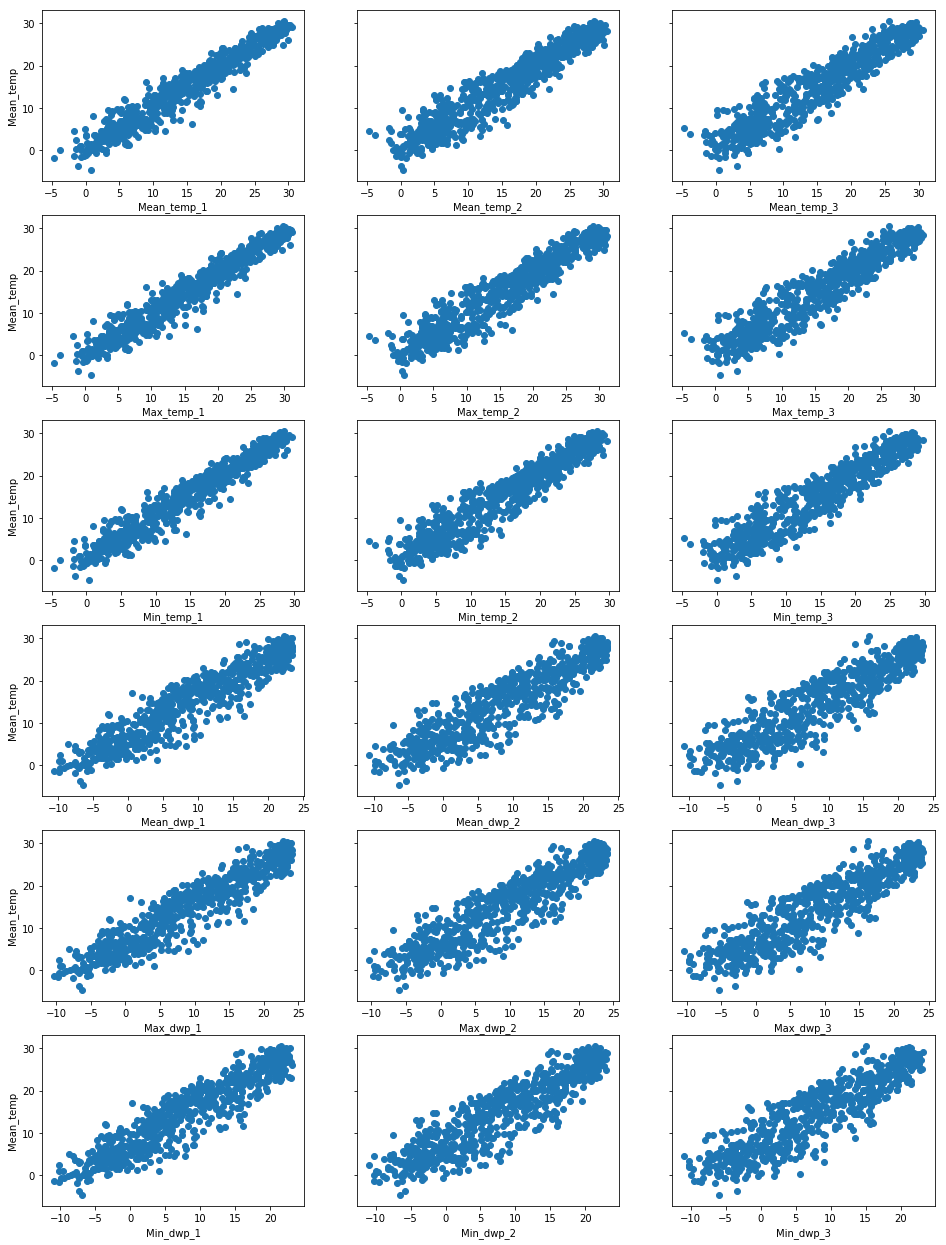

In [25]:
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 6 rows and 3 columns
arr = np.array(predictors).reshape(6, 3)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each meantempm vs each feature
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(weather_2[feature], weather_2['Mean_temp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='Mean_temp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show() 

In [26]:
# set X and y values
X = weather_2[predictors]  
y = weather_2['Mean_temp']

In [27]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Mean_temp_1,Mean_temp_2,Mean_temp_3,Max_temp_1,Max_temp_2,Max_temp_3,Min_temp_1,Min_temp_2,Min_temp_3,Mean_dwp_1,Mean_dwp_2,Mean_dwp_3,Max_dwp_1,Max_dwp_2,Max_dwp_3,Min_dwp_1,Min_dwp_2,Min_dwp_3
Date,,,,,,,,,,,,,,,,,,
2018-08-30,27.833333,27.458333,27.958333,28.625000,28.125000,28.541667,26.833333,26.791667,26.916667,21.325000,22.533333,21.475000,22.116667,23.200,22.058333,20.325000,21.866667,20.433333
2017-01-22,2.750000,4.458333,3.333333,2.791667,4.583333,3.458333,2.375000,4.041667,2.833333,-3.083333,-1.575000,-2.975000,-3.041667,-1.450,-2.850000,-3.458333,-1.991667,-3.475000
2017-12-12,5.478261,9.083333,3.916667,5.695652,9.583333,4.416667,5.173913,8.625000,3.541667,-4.130435,2.975000,-1.541667,-3.913043,3.475,-1.041667,-4.434783,2.516667,-1.916667
2018-01-08,3.958333,3.375000,1.708333,4.250000,3.875000,1.916667,3.625000,2.875000,1.291667,-2.983333,-1.400000,-0.275000,-2.691667,-0.900,-0.066667,-3.316667,-1.900000,-0.691667
2018-11-29,12.833333,12.375000,10.625000,13.166667,12.875000,11.000000,12.458333,11.791667,10.125000,7.758333,6.650000,5.241667,8.091667,7.150,5.616667,7.383333,6.066667,4.741667


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
# define the model
model = LinearRegression()

# traub the model/ fit the model to the traingin data
model.fit(X_train, y_train)

# predict
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [30]:
model.coef_

array([ 1.32466054, -0.11799818, -0.64789913, -0.04886026, -0.0219586 ,
        0.34563887, -0.50499303,  0.24858493,  0.54444238,  1.06149767,
       -0.19072392, -0.73240381, -0.31202313, -0.09468435,  0.26113419,
       -0.76815591,  0.17585919,  0.4599377 ])

In [31]:
pd.DataFrame({"True Temperatures": y_train, "Predicted Temperatures": y_train_prediction}).head()

,True Temperatures,Predicted Temperatures
Date,,
2018-08-30,28.250000,27.460160
2017-01-22,3.083333,2.947827
2017-12-12,2.666667,5.337633
2018-01-08,9.291667,3.228239
2018-11-29,9.500000,12.081282


In [32]:
# use evaluation metrics to determine model performance
r2_train = r2_score(y_train, y_train_prediction)
r2_test = r2_score(y_test, y_test_prediction)
print("The R^2 score for training data is:", r2_train)
print("The R^2 score for test data is:", r2_test)

The R^2 score for training data is: 0.9474610727532153
The R^2 score for test data is: 0.9523117541897774


In [33]:
# calculate the RMSE
RSME_train = mean_squared_error(y_train, y_train_prediction)**0.5
RSME_test = mean_squared_error(y_test, y_test_prediction)**0.5

print("The RSME for training data is:", RSME_train)
print("The RSME for test data is:", RSME_test)

The RSME for training data is: 1.9916016425777157
The RSME for test data is: 2.002049712359677


In [34]:
actual_x_predicted = {
    "Actual": y_train,
    "Predicted": y_train_prediction,
    "Error": RSME_train
}
pd.DataFrame(actual_x_predicted).head()

,Actual,Predicted,Error
Date,,,
2018-08-30,28.250000,27.460160,1.991602
2017-01-22,3.083333,2.947827,1.991602
2017-12-12,2.666667,5.337633,1.991602
2018-01-08,9.291667,3.228239,1.991602
2018-11-29,9.500000,12.081282,1.991602
